<a href="https://colab.research.google.com/github/anamtasiddiquii/SMS-EMAIL-spam-classifier-/blob/main/SMS_EMAIL_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np


In [4]:
df=pd.read_csv('spam.csv',encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


**1-data cleaning**

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isnull().sum()

,0
v1,0
v2,0


In [9]:
df.duplicated().sum()

np.int64(403)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.rename(columns={'v1':'target', 'v2':'input'},inplace=True)


**label encoding for "target column"**

In [13]:
import sklearn as sk
from sklearn.preprocessing import LabelEncoder


In [14]:
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])

In [15]:
df.head()

,target,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**EDA**

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt


In [17]:
df['target'].value_counts()

,count
target,
0,4516
1,653


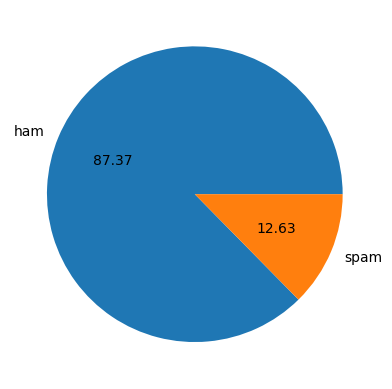

In [18]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

**"data is imbalanced bcs ~88% is ham & ~13% is spam**

In [19]:
import nltk

In [20]:
!pip install nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [23]:
#num of character
df['num_character']=df['input'].apply(len)

In [24]:
df.head()

,target,input,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#num of words
df['num_words']=df['input'].apply(lambda x:len(nltk.word_tokenize(x)))


In [26]:
#num of sentences
df['num_sentences']=df['input'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [27]:
df.head()

,target,input,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# ham
df[df['target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#spam

df[df['target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns


<Axes: xlabel='num_character', ylabel='Count'>

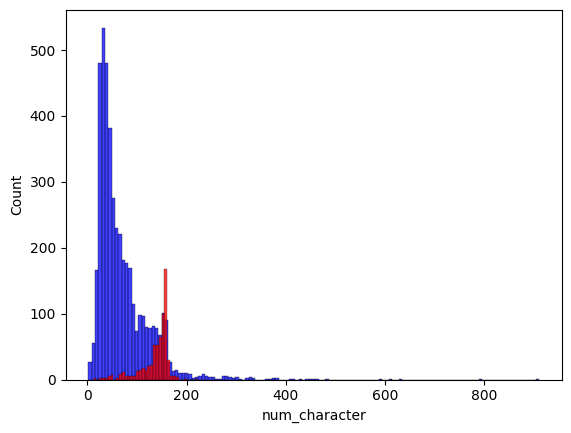

In [32]:
sns.histplot(df[df['target']==0]['num_character'],color='blue') #ham
sns.histplot(df[df['target']==1]['num_character'],color='red')#spam


<Axes: xlabel='num_words', ylabel='Count'>

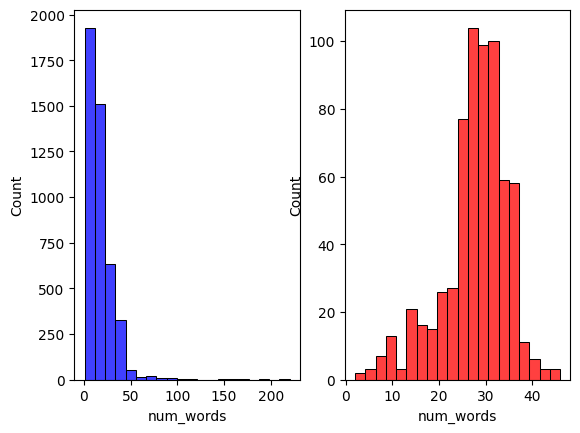

In [33]:
plt.subplot(1,2,1)

sns.histplot(df[df['target']==0]['num_words'],color='blue',bins=20) #ham
plt.subplot(1,2,2)
sns.histplot(df[df['target']==1]['num_words'],color='red',bins=20)#spam


<Axes: xlabel='num_sentences', ylabel='Count'>

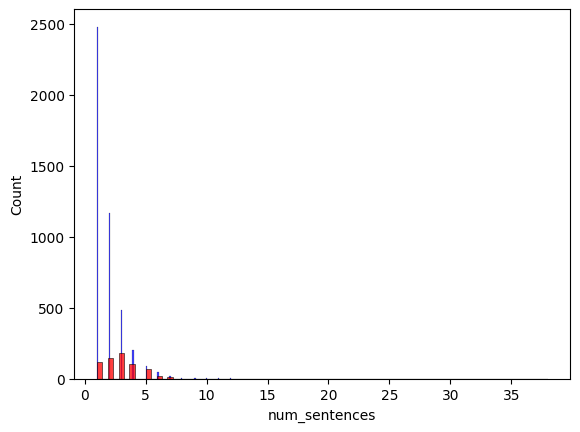

In [34]:

sns.histplot(df[df['target']==0]['num_sentences'],color='blue') #ham
sns.histplot(df[df['target']==1]['num_sentences'],color='red')#spam


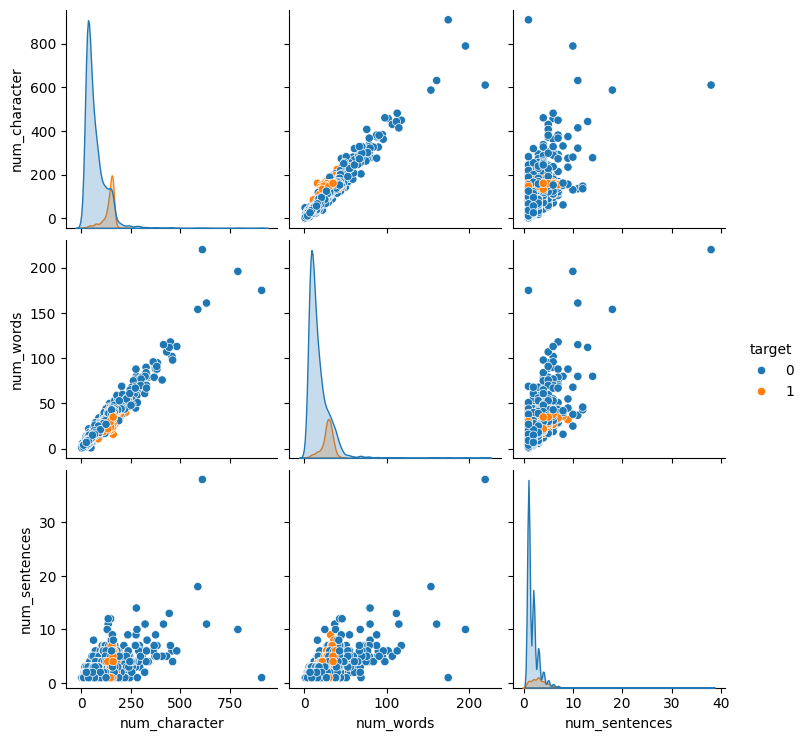

In [35]:
sns.pairplot(df,hue='target')

<Axes: >

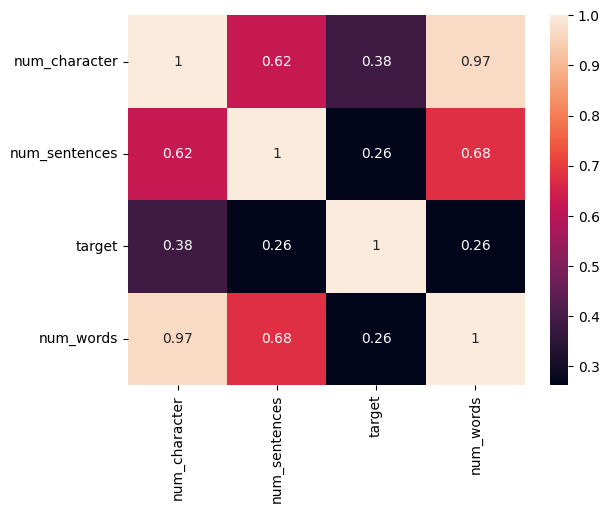

In [36]:
sns.heatmap(df[['num_character','num_sentences','target','num_words']].corr(),annot=True)

we will keep the num character since it has 0.38 with target (highest of all)

**3-DATA PROCESSING**

*lower case
*tokenization
* remove special character
* remove stop words(is, of...), punctuation
* stemming(dance,dancing=dance)

In [37]:
def transform_text(input):
  input=input.lower() #lower
  input=nltk.word_tokenize(input) #word tokenization

  y=[] #special character

  for i in input:
    if i.isalnum():
      y.append(i)

  input=y[:] # stopwords & punctuation
  y.clear()

  for i in input:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  input=y[:]
  y.clear()

  for i in input:
    y.append(ps.stem(i))

  return " ".join(y)

In [38]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
#to see stop words
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [40]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')



'danc'

In [41]:
# to see punctuation

import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
transform_text("HOOWWOellllo ") #LOWER

'hoowwoellllo'

In [43]:
transform_text("meow is happy") #word tokenization

'meow happi'

In [44]:
transform_text("wow 20% @") #special character

'wow 20'

In [45]:
# punctuation & stop words
transform_text('hey you are good ?')

'hey good'

In [46]:
#stemming
transform_text('I hope u are fine? are you free tonight for dancing @')

'hope u fine free tonight danc'

In [47]:
df['transformed_text']=df['input'].apply(transform_text)


create "word cloud"

In [48]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='black')


In [49]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))


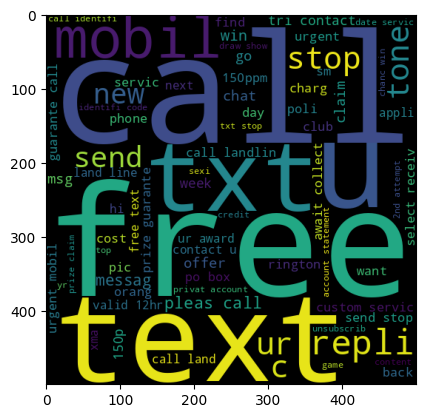

In [50]:
plt.imshow(spam_wc)

In [51]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))


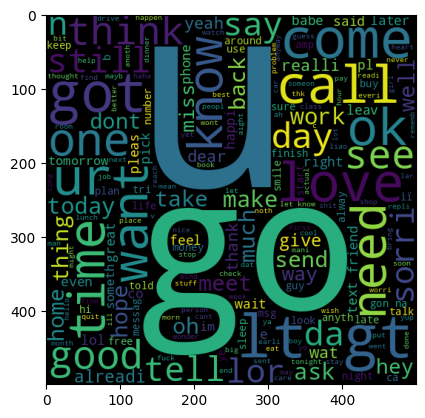

In [52]:
plt.imshow(ham_wc)

top words that are repeting in spam

In [53]:

#for spam words
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)



In [54]:
len(spam_corpus)

9939

In [55]:
from collections import Counter
Counter(spam_corpus).most_common(30) # top 30 words of spam

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [56]:
#ham words
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

In [57]:
from collections import Counter
Counter(ham_corpus).most_common(30) # top 30 words of ham

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

**4-MODEL BUILDING**

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer( max_features=3000)




In [59]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:
y=df['target'].values

In [61]:
from sklearn.model_selection import train_test_split


In [62]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [65]:
gnb.fit(X_train,y_train)
y_pred1 =gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))



0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


 i will go for mnb since precision is 1.0 and dataset is imbalanced so accuracy is not arelaible measure tool

In [66]:
mnb.fit(X_train,y_train)
y_pred2 =mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [67]:
bnb.fit(X_train,y_train)
y_pred3 =bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [68]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [69]:
from google.colab import files
files.download("model.pkl")
files.download("vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>